In [1]:
cd "C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN"

C:\Users\aloe8475\Dropbox (Sydney Uni)\Data\ASN_simulation\Python\ASN


In [14]:
from scipy.io import loadmat, savemat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import networkx as nx
from utils import *

from itertools import permutations 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, Normalizer

import warnings
warnings.filterwarnings('ignore')

In [15]:
def trainTest(IDrain1_Train, VSource1_Train, IDrain1_Test, VSource1_Test, IDrain2_Test, VSource2_Test):
    start_time = 0
    X = IDrain1_Train[start_time:].reshape(-1,1)

    y = VSource1_Train[start_time:].reshape(-1,1)
    y = (y == np.nanmax(y))

    X_Test=IDrain1_Test[start_time:].reshape(-1,1)
    X_Test2=IDrain2_Test[start_time:].reshape(-1,1)
    y_Test=VSource1_Test[start_time:].reshape(-1,1)
    y_Test = (y_Test == np.nanmax(y_Test))
    y_Test2=VSource2_Test[start_time:].reshape(-1,1)
    y_Test2 = (y_Test == np.nanmax(y_Test2))

#     clf = SVC(kernel = 'linear', C = 1, probability = False).fit(X, y) #change kernel here
    clf = LinearDiscriminantAnalysis().fit(X, y)

#     y_pred = clf.predict(X_Test2)
#     y_pred2 = clf.predict(X_Test)

#     print('Test 1 accuracy:', clf.score(X_Test, y_Test), '| Time Delay:', sep_Test1, '| Test Class:', classifier[0][simNum_Test1], '| Train Class:',  classifier[0][simNum_Train])
#     print('Test 2 accuracy:', clf.score(X_Test2, y_Test2), '| Time Delay:', sep_Test2, '| Test Class:', classifier[0][simNum_Test2], '| Train Class:',  classifier[0][simNum_Train])
    
    # Plot hack
    lin = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
    boundary = lin[np.argmax(clf.predict(lin))][0]
    
    return clf.score(X_Test, y_Test), clf.score(X_Test2, y_Test2),clf.score(X, y), boundary

In [16]:
# Load Samples for Early/Mid/Late/Never

pairType='different';
# pairType='same';

connectivityPath="C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN/connectivity_data/"

# path= r"C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN/data/uncollapsed/"

if pairType=='different':
    path= r"C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN/data/collapsed/Variable Path Length/"
    classifier = loadmat(connectivityPath +'emln_1.mat')['bang']
    pairinglist=loadmat(connectivityPath +'ElecPos.mat')['elecPos']-1
    pairinglist[0,:] = np.array([4,17])
    pairinglist[80,:] = np.array([22, 80])
    pairinglist[81,:] = np.array([99, 81])
        
elif pairType =='same':
    path= r"C:/Users/aloe8475/Dropbox (Sydney Uni)/Data/ASN_simulation/Python/ASN/data/collapsed/Path Length 4/"
    classifier = loadmat(connectivityPath +'emln_1_PL4.mat')['bang']
    pairinglist=loadmat(connectivityPath +'ElecPosPathLength.mat')['ElecPos'] 



In [17]:
adj = loadmat('connectivity_data/AdjMat100nw.mat')['adjmat'].todense()
theAlon = nx.from_numpy_array(adj)

Connectivity = connectivity__(graph = theAlon)

# Which pairings have the same length? & Different COMM values
adjMat=Connectivity.adj_matrix
pathLength=8;

distMat = np.zeros(adjMat.shape)
distMatElec= np.zeros(pairinglist.shape[0])
G = nx.from_numpy_array(adjMat)
# for i in range(adjMat[:,0].size):
#      for j in range(i+1, adjMat[:,0].size):
#         distMat[i,j] = nx.shortest_path_length(G, i, j)
# distMat = distMat + distMat.T

rows=len(pairinglist)
for i in range(rows):
        distMatElec[i]=nx.shortest_path_length(G,pairinglist[i,0],pairinglist[i,1])
        
pathLength=distMatElec

In [18]:
distMatElec

array([ 3.,  3.,  6., 10.,  3.,  6.,  4.,  8.,  7.,  6.,  6., 12.,  9.,
        3.,  1.,  3.,  6.,  7.,  5.,  2.,  9.,  4.,  2.,  3.,  7.,  4.,
        7.,  4.,  3.,  9.,  8.,  3.,  2.,  9.,  5.,  5.,  3.,  7.,  5.,
        4.,  5.,  3.,  8., 10.,  1.,  3., 10.,  6.,  5.,  7.,  6.,  4.,
        4.,  6.,  4.,  7.,  1.,  5.,  5.,  4.,  7.,  5.,  3.,  9.,  1.,
        1.,  2.,  5.,  1.,  5.,  2.,  5.,  4., 10.,  3.,  6.,  2.,  6.,
        1.,  5.,  7.,  5.,  9.,  1.,  1.,  3.,  6.,  6.,  3.,  1.,  1.,
        7.,  2.,  7.,  9.,  6.,  6.,  4.,  2.,  4.])

In [19]:
early = np.where(classifier[0] == 0)[0]
mid = np.where(classifier[0] == 1)[0]
late = np.where(classifier[0] == 2)[0]
never = np.where(classifier[0] == 3)[0]

earlyRand=np.random.choice(early,1)[0]
midRand=np.random.choice(mid,1)[0]
lateRand=np.random.choice(late,1)[0]
neverRand=np.random.choice(never,1)[0]

randPair_idx = [earlyRand, midRand, lateRand, neverRand]

randPairings = [pairinglist[i] for i in randPair_idx]

# earlyPair=pairinglist[earlyRand]
# midPair=pairinglist[midRand]
# latePair=pairinglist[lateRand]
# neverPair=pairinglist[neverRand]

# randPairings = [earlyPair, midPair, latePair, neverPair]
time_seps = [50, 500, 1000]
sperm = [i for i in permutations([0,1,2,3],3)]
time_sperm = [i for i in permutations([0,1,2],3)]

In [20]:
master_sperm = []
for i in range(len(sperm)):
# for i in range(14):
# for i in range(1):
    train, test1, test2 = randPairings[sperm[i][0]], randPairings[sperm[i][1]], randPairings[sperm[i][2]]
    pathTrain, pathTest1, pathTest2 = pathLength[randPair_idx[sperm[i][0]]], pathLength[randPair_idx[sperm[i][1]]], pathLength[randPair_idx[sperm[i][2]]]
    file_train = loadmat(path+'source_'+str(train[0])+'_drain_'+str(train[1]))
    file_test1 = loadmat(path+'source_'+str(test1[0])+'_drain_'+str(test1[1]))
    file_test2 = loadmat(path+'source_'+str(test2[0])+'_drain_'+str(test2[1]))
    for j in range(len(time_sperm)):
        train_sep, test1_sep, test2_sep = time_seps[time_sperm[j][0]], time_seps[time_sperm[j][1]], time_seps[time_sperm[j][2]]
        train_IDrain = file_train['sep_'+str(train_sep)][0][0]['IDrain1']
        train_VSource = file_train['sep_'+str(train_sep)][0][0]['VSource1']
        test1_IDrain = file_test1['sep_'+str(test1_sep)][0][0]['IDrain1']
        test1_VSource = file_test1['sep_'+str(test1_sep)][0][0]['VSource1']
        test2_IDrain = file_test2['sep_'+str(test2_sep)][0][0]['IDrain1']
        test2_VSource = file_test2['sep_'+str(test2_sep)][0][0]['VSource1']
        score1, score2, scoreTrain, boundary = trainTest(train_IDrain, train_VSource, test1_IDrain, test1_VSource, test2_IDrain, test2_VSource)
        
        temp_dict = dict(train_class = sperm[i][0],
                         train_sep = train_sep,
                         train_accuracy= scoreTrain,
                         test1_class = sperm[i][1],
                         test1_sep = test1_sep,
                         test1_accuracy = score1,
                         test2_calss = sperm[i][2],
                         test2_sep = test2_sep,
                         test2_accuracy = score2,
                         boundary = boundary,
                         train_pathLength = pathTrain,
                         test1_pathLength = pathTest1,
                         test2_pathLength = pathTest2)                                
        master_sperm.append(temp_dict)

In [21]:
master_sperm

[{'train_class': 0,
  'train_sep': 50,
  'train_accuracy': 0.9895,
  'test1_class': 1,
  'test1_sep': 500,
  'test1_accuracy': 0.8,
  'test2_calss': 2,
  'test2_sep': 1000,
  'test2_accuracy': 0.8,
  'boundary': 0.00012659565504982392,
  'train_pathLength': 1.0,
  'test1_pathLength': 4.0,
  'test2_pathLength': 5.0},
 {'train_class': 0,
  'train_sep': 50,
  'train_accuracy': 0.9895,
  'test1_class': 1,
  'test1_sep': 1000,
  'test1_accuracy': 0.8,
  'test2_calss': 2,
  'test2_sep': 500,
  'test2_accuracy': 0.8,
  'boundary': 0.00012659565504982392,
  'train_pathLength': 1.0,
  'test1_pathLength': 4.0,
  'test2_pathLength': 5.0},
 {'train_class': 0,
  'train_sep': 500,
  'train_accuracy': 0.9895,
  'test1_class': 1,
  'test1_sep': 50,
  'test1_accuracy': 0.8,
  'test2_calss': 2,
  'test2_sep': 1000,
  'test2_accuracy': 0.8,
  'boundary': 0.00012652766978944686,
  'train_pathLength': 1.0,
  'test1_pathLength': 4.0,
  'test2_pathLength': 5.0},
 {'train_class': 0,
  'train_sep': 500,
  'tra

In [11]:
# Explore
def plotTimeSeries(VSource1_Test,VSource1_Train,IDrain1_Train,IDrain1_Test,IDrain2_Test,VSource2_Test, boundary = None):
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))

    axes[0].plot(VSource1_Train.ravel(), label = 'VSource Train'); axes[0].plot(VSource1_Test.ravel(), label = 'VSource Test'); axes[0].plot(VSource2_Test.ravel(), label = 'VSource Test2')
    axes[0].set_title("Input to device - Target for learning (y)"); axes[0].set_xlabel('Time'); axes[0].set_ylabel('V')
    axes[0].legend()
    axes[1].plot(IDrain1_Train.ravel(), label = 'IDrain Train'); axes[1].plot(IDrain1_Test.ravel(), label = 'IDrain Test'); axes[1].plot(IDrain2_Test.ravel(), label = 'IDrain Test2')
    axes[1].set_title("Output of device - Features for learning (X)"); axes[1].set_xlabel('Time'); axes[1].set_ylabel('A')
    axes[1].legend()
    
    if boundary is not None:
        axes[1].axhline(boundary, linestyle = '--', color = 'k')

    # fig.savefig(save_path + filename_train_save + m + '_Training_Parameters_'+datetime.datetime.now().strftime("%Y-%m-%d") +'.jpg')
    # fig.savefig(save_path + filename_train_save + m +'_Training_Parameters_'+datetime.datetime.now().strftime("%Y-%m-%d") +'.eps')
    return axes

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C7A94AEF0>,
      dtype=object)

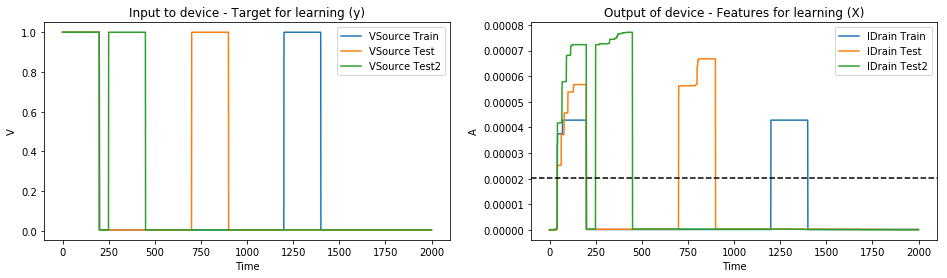

In [12]:
plotTimeSeries(test1_VSource,train_VSource,train_IDrain,test1_IDrain,test2_IDrain,test2_VSource, boundary)

In [22]:
# import csv

# keys = master_sperm[0].keys()
# with open('exp4_classification_v1.5_PathLength4_sp1000.csv', 'w') as output_file:
#     dict_writer = csv.DictWriter(output_file, keys)
#     dict_writer.writeheader()
#     dict_writer.writerows(master_sperm)

# savemat(path+"exp4_classification_v1_PathLength4_sp1000.mat",dict(Data=master_sperm))
savemat(path+"exp4_classification_v1_variablePathLength_sp1000.mat",dict(Data=master_sperm))

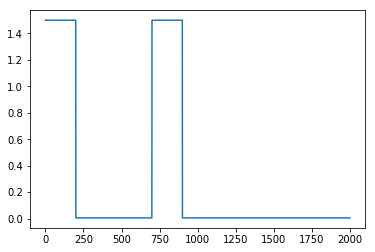

In [25]:
plt.plot(test1_VSource[0])

In [62]:
train_IDrain.max()

6.767601078871039e-05

In [60]:
test1_VSource.shape

(1, 2000)

In [63]:
lin = np.linspace(train_IDrain.min(), train_IDrain.max(), 50)

array([7.18957203e-08, 1.45157154e-06, 2.83124736e-06, 4.21092317e-06,
       5.59059899e-06, 6.97027481e-06, 8.34995063e-06, 9.72962644e-06,
       1.11093023e-05, 1.24889781e-05, 1.38686539e-05, 1.52483297e-05,
       1.66280055e-05, 1.80076814e-05, 1.93873572e-05, 2.07670330e-05,
       2.21467088e-05, 2.35263846e-05, 2.49060604e-05, 2.62857363e-05,
       2.76654121e-05, 2.90450879e-05, 3.04247637e-05, 3.18044395e-05,
       3.31841153e-05, 3.45637912e-05, 3.59434670e-05, 3.73231428e-05,
       3.87028186e-05, 4.00824944e-05, 4.14621703e-05, 4.28418461e-05,
       4.42215219e-05, 4.56011977e-05, 4.69808735e-05, 4.83605493e-05,
       4.97402252e-05, 5.11199010e-05, 5.24995768e-05, 5.38792526e-05,
       5.52589284e-05, 5.66386042e-05, 5.80182801e-05, 5.93979559e-05,
       6.07776317e-05, 6.21573075e-05, 6.35369833e-05, 6.49166592e-05,
       6.62963350e-05, 6.76760108e-05])